En aquesta segona entrega determinarem el millor algoritme de machine learning a utilitzar en el nostre problema. 

També provarem diferents solucions al nostre principal problema; classes desbalancejades.

**INDEX**
1.   Importar Llibreries i Càrrega de dades

2.   Algoritmes aplicats amb els datasets originals de TRAIN i TEST

*   Algoritmes basats en distancia
*   Algoritmes probabilístics
*   Algoritmes basats en regles
*   Algoritmes basats en hiperplans
*   Discussió dels resultats obtinguts a partir dels diferents algoritmes SENSE BALANCEJAR

3.   Algoritmes aplicats amb els datasets modificats amb DOWNSAMPLING

*   Algoritmes basats en distancia
*   Algoritmes probabilístics
*   Algoritmes basats en regles
*   Algoritmes basats en hiperplans
*   Discussió dels resultats obtinguts a partir dels diferents algoritmes fent servir DOWNSAMPLING

4.   Algoritmes aplicats amb els datasets modificats amb SMOTE

*   Algoritmes basats en distancia
*   Algoritmes probabilístics
*   Algoritmes basats en regles
*   Algoritmes basats en hiperplans
*   Discussió dels resultats obtinguts a partir dels diferents algoritmes fent servir SMOTE



5.   Discussió dels resultats finals

# Importar Llibreries i Càrrega de dades



In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle


import numpy as np
import missingno as msno
import numpy as np
sns.set_theme()

drive.mount('/content/drive')
dt_train = pd.read_csv('/content/drive/My Drive/TREBALL_IAAE/Jordi_Marc/dataset_apoplexia_training.csv',index_col=0)
dt_test = pd.read_csv('/content/drive/My Drive/TREBALL_IAAE/Jordi_Marc/dataset_apoplexia_testing.csv',index_col=0)



Mounted at /content/drive


# Algoritmes aplicats amb els datasets originals de TRAIN i TEST

A continuació importem la llibreria sklearn i els seus mètodes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, f1_score, make_scorer, recall_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_curve, recall_score, accuracy_score, precision_score, plot_confusion_matrix, confusion_matrix
from sklearn.svm import SVC


In [ ]:
f1 = make_scorer(f1_score,pos_label = 'Yes')

In [1]:
def classificacio(clf, tuning=False):
  clf.fit(dt_train.iloc[:,:-1], dt_train.iloc[:,-1])
  preds = pd.Series(clf.predict(dt_test.iloc[:,:-1]), name='preds')
  reals = dt_test.iloc[:,-1]
  reals.name = 'reals'
  reals.index = range(len(preds))
  print('acc: ', accuracy_score(reals, preds))
  print('rec: ', recall_score(reals,preds, pos_label='Yes'))
  print('prec: ',recall_score(reals,preds, pos_label='Yes'))
  print('f1:', f1_score(reals, preds, pos_label='Yes'))
  if tuning:
    print('best pars:', clf.best_params_)
  display(pd.crosstab(reals,preds))
  return [reals,preds]


In [2]:
dt_train['stroke'].value_counts()

NameError: name 'dt_train' is not defined

In [ ]:
dt_test['stroke'].value_counts()

No     1458
Yes      75
Name: stroke, dtype: int64

In [ ]:
resultats1 = {}

Com es pot observar, la classe "Stroke" presenta el mateix percentatge de valors "Yes" i "No" als fitxers de train i test. Tot i així, la diferència entre el total de "Yes" i "No" es bastant notable -de l'ordre de 174 "Yes" i 3403 "No" a l'arxiu de train-.

Aquesta desigualtat provoca una distorsió en les prediccions ja que en el train, la màquina gairebé no analitza casuístiques de "Yes" i es veu altament influenciat per la gran quantitat de "No".

Més endavant haurem d'emprar mètodes de balanceig que facin que hi hagi el mateix nombre de "Yes" que de "No", ja sigui afegint files de "Yes" o eliminant files de "No", fins assolir el 50%.

## Algoritmes basats en distància

### kNN

In [ ]:
%%time
pgrid = {'n_neighbors': [1,3,5,7,11],'weights': ['uniform','distance']}
resultats1['knn_acc']=classificacio(GridSearchCV(KNeighborsClassifier(),pgrid,scoring='accuracy'), True)

acc:  0.9517286366601435
rec:  0.013333333333333334
prec:  0.013333333333333334
f1: 0.02631578947368421
best pars: {'n_neighbors': 11, 'weights': 'uniform'}


preds,No,Yes
reals,,
No,1458,0
Yes,74,1


CPU times: user 4.75 s, sys: 1.7 s, total: 6.44 s
Wall time: 10.6 s


In [ ]:
%%time
pgrid = {'n_neighbors': [1,3,5,7,11],'weights': ['uniform','distance']}
resultats1['knn_f1']=classificacio(GridSearchCV(KNeighborsClassifier(),pgrid,scoring=f1), True)

acc:  0.9171559034572733
rec:  0.16
prec:  0.16
f1: 0.15894039735099338
best pars: {'n_neighbors': 1, 'weights': 'uniform'}


preds,No,Yes
reals,,
No,1394,64
Yes,63,12


CPU times: user 4.72 s, sys: 2.61 s, total: 7.33 s
Wall time: 7.1 s


### Nearest Centroid

In [ ]:
%%time
resultats1['nearest_centroid']=classificacio(NearestCentroid())

acc:  0.6477495107632094
rec:  0.7733333333333333
prec:  0.7733333333333333
f1: 0.17682926829268292


preds,No,Yes
reals,,
No,935,523
Yes,17,58


CPU times: user 99.6 ms, sys: 0 ns, total: 99.6 ms
Wall time: 113 ms


## Algoritmes probabilístics

### Gaussian NB

In [ ]:
%%time
resultats1['gaussian_nb']=classificacio(GaussianNB())

acc:  0.345075016307893
rec:  1.0
prec:  1.0
f1: 0.12998266897746968


preds,No,Yes
reals,,
No,454,1004
Yes,0,75


CPU times: user 114 ms, sys: 4.21 ms, total: 118 ms
Wall time: 189 ms


In [ ]:
#f1_score(['Yes','Yes'],['No','No'],pos_label='Yes')
#f1_score([1,1],[0,1],pos_label=1)

### LDA

In [ ]:
resultats1['lda']=classificacio(LinearDiscriminantAnalysis(shrinkage='auto',solver='lsqr'))

acc:  0.9478147423352903
rec:  0.06666666666666667
prec:  0.06666666666666667
f1: 0.1111111111111111


preds,No,Yes
reals,,
No,1448,10
Yes,70,5


### Logistic Regression

In [ ]:
resultats1['logistic_regression']=classificacio(LogisticRegression())

acc:  0.9510763209393346
rec:  0.0
prec:  0.0
f1: 0.0


preds,No
reals,
No,1458
Yes,75


## Algoritmes basats en regles

### Learning Decision Tree

In [ ]:
resultats1['lerning_decision_tree']=classificacio(DecisionTreeClassifier())

acc:  0.9171559034572733
rec:  0.25333333333333335
prec:  0.25333333333333335
f1: 0.23030303030303031


preds,No,Yes
reals,,
No,1387,71
Yes,56,19


### Bagging with kNN

In [ ]:
resultats1['bagging with KNN']=classificacio(BaggingClassifier(KNeighborsClassifier()))

acc:  0.9504240052185258
rec:  0.02666666666666667
prec:  0.02666666666666667
f1: 0.05


preds,No,Yes
reals,,
No,1455,3
Yes,73,2


### Random Forest

In [ ]:
resultats1['random forest']=classificacio(RandomForestClassifier(n_estimators=10))

acc:  0.9478147423352903
rec:  0.02666666666666667
prec:  0.02666666666666667
f1: 0.047619047619047616


preds,No,Yes
reals,,
No,1451,7
Yes,73,2


### AdaBoost

In [ ]:
resultats1['adaboost']=classificacio(AdaBoostClassifier())

acc:  0.9504240052185258
rec:  0.0
prec:  0.0
f1: 0.0


preds,No,Yes
reals,,
No,1457,1
Yes,75,0


### GradientBoosting

In [ ]:
resultats1['gradient boosting']=classificacio(GradientBoostingClassifier())

acc:  0.9497716894977168
rec:  0.04
prec:  0.04
f1: 0.07228915662650602


preds,No,Yes
reals,,
No,1453,5
Yes,72,3


## Algoritmes basats en hiperplans

### SVC

In [ ]:
resultats1['svc_linear']=classificacio(SVC(kernel='linear',C=1,tol=0.1,max_iter=51))
# C=0.9 no esta mal

acc:  0.16046966731898238
rec:  0.9466666666666667
prec:  0.9466666666666667
f1: 0.09937018894331699


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,175,1283
Yes,4,71


In [ ]:
resultats1['svc_poly']=classificacio(SVC(kernel='poly', degree=5, gamma='scale',C=1,tol=0.1,max_iter=10))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


acc:  0.060013046314416174
rec:  0.9466666666666667
prec:  0.9466666666666667
f1: 0.08970309538850284


preds,No,Yes
reals,,
No,21,1437
Yes,4,71


In [ ]:
resultats1['svc_rbf']=classificacio(SVC(kernel='rbf', gamma='scale',C=10,tol=0.1,max_iter=50))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


acc:  0.6692759295499021
rec:  0.22666666666666666
prec:  0.22666666666666666
f1: 0.06284658040665435


preds,No,Yes
reals,,
No,1009,449
Yes,58,17


### Perceptron

In [ ]:
resultats1['perceptron']=classificacio(Perceptron())

acc:  0.9347684279191129
rec:  0.12
prec:  0.12
f1: 0.15254237288135591


preds,No,Yes
reals,,
No,1424,34
Yes,66,9


### MLP

In [ ]:
resultats1['mlp']=classificacio(MLPClassifier(hidden_layer_sizes=(25,)))

acc:  0.9517286366601435
rec:  0.013333333333333334
prec:  0.013333333333333334
f1: 0.02631578947368421


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,1458,0
Yes,74,1


## Discussió dels resultats obtinguts a partir dels diferents algoritmes SENSE BALANCEJAR

Amb l'arxiu de dades sense balancejar, s'observa que per molts algoritmes s'assoleix una "accuracy" superior al 90%. En el nostre cas, això no és gaire representatiu a causa del desbalanceig de dades, el bias està desviat.
Si per exemple forcessim que la predicció fos sempre "No" ja assoliriem un 95% de "accuracy", el qual realment no seria correcte.

Per aquest motiu decidim utilitzar el F1_SCORE. Aquesta mètrica es sol utilitzar en arxius de dades desbalancejats, com és el nostre cas. 

    F1_SCORE = 2 * (precisio*recall)/(precisió+recall)

D'aquesta forma combinem les mesures de precisió i recall, retornant una mesura de qualitat més realista del nostre model.

Més endevant tractarem els casos dels falsos negatius, ja que al treballar amb un dataset de medicina aquests prenen gran importància i podrien ser el factor clau que determini el millor model.

L'algoritme més adequat per el dataset desbalancejat és l'aplicat com Learning Decission Tree. Aquest ens aporta el f-score més elevat, que és del 21,25%. Cal tenir en compte que aquest presenta un total de 58 falsos positius
, lo qual podria ser perillòs. A continuació balancejarem el model per diferents mètodes i continuarem provant els mateixos algoritmes.




In [ ]:
for i in resultats1:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats1[i][0],resultats1[i][1]))
  print(' - recall_score:',100*recall_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats1['knn_f1'][0],resultats1['knn_f1'][1]))
  print('  ')
  print('  ')

KNN_ACC :
 - f1_score: 2.631578947368421
 - accuracy_score: 95.17286366601435
 - recall_score: 1.3333333333333335
 - precision_score: 100.0
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
KNN_F1 :
 - f1_score: 15.894039735099339
 - accuracy_score: 91.71559034572732
 - recall_score: 16.0
 - precision_score: 15.789473684210526
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
NEAREST_CENTROID :
 - f1_score: 17.682926829268293
 - accuracy_score: 64.77495107632095
 - recall_score: 77.33333333333333
 - precision_score: 9.982788296041308
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
GAUSSIAN_NB :
 - f1_score: 12.99826689774697
 - accuracy_score: 34.5075016307893
 - recall_score: 100.0
 - precision_score: 6.950880444856349
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
LDA :
 - f1_score: 11.11111111111111
 - accuracy_score: 94.78147423352902
 - recall_score: 6.666666666666667
 - precision_score: 33.33333333333333
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
L

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  
ADABOOST :
 - f1_score: 0.0
 - accuracy_score: 95.04240052185257
 - recall_score: 0.0
 - precision_score: 0.0
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
GRADIENT BOOSTING :
 - f1_score: 7.228915662650602
 - accuracy_score: 94.97716894977168
 - recall_score: 4.0
 - precision_score: 37.5
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
SVC_LINEAR :
 - f1_score: 9.937018894331699
 - accuracy_score: 16.046966731898237
 - recall_score: 94.66666666666667
 - precision_score: 5.243722304283604
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
SVC_POLY :
 - f1_score: 8.970309538850284
 - accuracy_score: 6.001304631441617
 - recall_score: 94.66666666666667
 - precision_score: 4.708222811671088
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
SVC_RBF :
 - f1_score: 6.284658040665435
 - accuracy_score: 66.92759295499022
 - recall_score: 22.666666666666664
 - precision_score: 3.648068669527897
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
PERCEPTRON :
 - f1_score

In [ ]:
resultats1_millors = {}
sorted_keys = ['lerning_decision_tree','nearest_centroid','knn_f1','perceptron']

for w in sorted_keys:
    resultats1_millors[w] = resultats1[w]

In [ ]:
for i in resultats1_millors:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats1[i][0],resultats1[i][1]))
  print(' - recall_score:',100*recall_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats1[i][0],resultats1[i][1]))
  print('  ')
  print('  ')

LERNING_DECISION_TREE :
 - f1_score: 23.03030303030303
 - accuracy_score: 91.71559034572732
 - recall_score: 25.333333333333336
 - precision_score: 21.11111111111111
 - confusion matrix:
[[1387   71]
 [  56   19]]
  
  
NEAREST_CENTROID :
 - f1_score: 17.682926829268293
 - accuracy_score: 64.77495107632095
 - recall_score: 77.33333333333333
 - precision_score: 9.982788296041308
 - confusion matrix:
[[935 523]
 [ 17  58]]
  
  
KNN_F1 :
 - f1_score: 15.894039735099339
 - accuracy_score: 91.71559034572732
 - recall_score: 16.0
 - precision_score: 15.789473684210526
 - confusion matrix:
[[1394   64]
 [  63   12]]
  
  
PERCEPTRON :
 - f1_score: 15.254237288135592
 - accuracy_score: 93.47684279191128
 - recall_score: 12.0
 - precision_score: 20.930232558139537
 - confusion matrix:
[[1424   34]
 [  66    9]]
  
  


# Algoritmes aplicats amb els datasets modificats amb DOWNSAMPLING

Per tal d'igualar el nombre de "Yes" i de "No" de la classe "Stroke", hem balancejat els datasets originals de train i test eliminant files corresponents a valors negatius "No" fins arribar al 50%.

Donat que el nostre arxiu ara està balancejat, únicament estudiarem la mesura "accuracy". Ja no cal emprar el F-SCORE.


In [ ]:
n=dt_train['stroke'].value_counts()[0]
dt_train_bal = dt_train
for i in dt_train_bal.index:
  if dt_train["stroke"][i]=='No' and n>dt_train['stroke'].value_counts()[1]:
    n=n-1
    dt_train_bal=dt_train_bal.drop(i,axis=0)


In [ ]:
dt_train_bal['stroke'].value_counts()

Yes    174
No     174
Name: stroke, dtype: int64

Un cop balancejat, treballarem amb un arxiu de train amb 348 files.

In [ ]:
def classificacio_2(clf, tuning=False):
  clf.fit(dt_train_bal.iloc[:,:-1], dt_train_bal.iloc[:,-1])
  preds = pd.Series(clf.predict(dt_test.iloc[:,:-1]), name='preds')
  reals = dt_test.iloc[:,-1]
  reals.name = 'reals'
  reals.index = range(len(preds))
  print('acc:', accuracy_score(reals, preds))
  if tuning:
    print('best pars.:', clf.best_params_)
  display(pd.crosstab(reals,preds))
  return [reals,preds]

In [ ]:
resultats2={}

## Algoritmes basats en distàcia

### kNN

In [ ]:
%%time
pgrid = {'n_neighbors': [1,3,5,7,11],'weights': ['uniform','distance']}
resultats2['knn_acc']=classificacio_2(GridSearchCV(KNeighborsClassifier(),pgrid), True)

acc: 0.6099151989562949
best pars.: {'n_neighbors': 11, 'weights': 'uniform'}


preds,No,Yes
reals,,
No,883,575
Yes,23,52


CPU times: user 602 ms, sys: 452 ms, total: 1.05 s
Wall time: 568 ms


### Nearest Centroid

In [ ]:
%%time
resultats2['nearest_centroid']=classificacio_2(NearestCentroid())

acc: 0.6418786692759295


preds,No,Yes
reals,,
No,927,531
Yes,18,57


CPU times: user 34.9 ms, sys: 4.93 ms, total: 39.8 ms
Wall time: 39.4 ms


## Algoritmes probabilístics

### Gaussian NB

In [ ]:
%%time
resultats2['gaussian_nb']=classificacio_2(GaussianNB())

acc: 0.25244618395303325


preds,No,Yes
reals,,
No,312,1146
Yes,0,75


CPU times: user 31.1 ms, sys: 560 µs, total: 31.7 ms
Wall time: 31 ms


### LDA

In [ ]:
resultats2['lda']=classificacio_2(LinearDiscriminantAnalysis(shrinkage='auto',solver='lsqr'))

acc: 0.7084148727984344


preds,No,Yes
reals,,
No,1019,439
Yes,8,67


### Logistic Regression

In [ ]:
resultats2['logistic_regression']=classificacio_2(LogisticRegression())

acc: 0.715590345727332


preds,No,Yes
reals,,
No,1030,428
Yes,8,67


## Algoritmes basats en regles

### Learning Decission Tree

In [ ]:
resultats2['learning_decission_tree']=classificacio_2(DecisionTreeClassifier())

acc: 0.6405740378343118


preds,No,Yes
reals,,
No,927,531
Yes,20,55


### Bagging with kNN

In [ ]:
resultats2['bagging_with_knn']=classificacio_2(BaggingClassifier(KNeighborsClassifier()))

acc: 0.644487932159165


preds,No,Yes
reals,,
No,938,520
Yes,25,50


### Random Forest

In [ ]:
resultats2['random forest']=classificacio_2(RandomForestClassifier(n_estimators=10))

acc: 0.720808871493803


preds,No,Yes
reals,,
No,1052,406
Yes,22,53


### AdaBoost

In [ ]:
resultats2['ada boost']=classificacio_2(AdaBoostClassifier())

acc: 0.6686236138290933


preds,No,Yes
reals,,
No,960,498
Yes,10,65


### GradientBoosting

In [ ]:
resultats2['gradient boosting']=classificacio_2(GradientBoostingClassifier())

acc: 0.6960208741030659


preds,No,Yes
reals,,
No,1007,451
Yes,15,60


## Algoritmes basats en hiperplans

### SVC

In [ ]:
resultats2['svc']=classificacio_2(SVC(kernel='linear',C=1,tol=0.1,max_iter=51))

acc: 0.6373124592302675


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,924,534
Yes,22,53


In [ ]:
classificacio_2(SVC(kernel='poly', degree=5, gamma='scale',C=1,tol=0.1,max_iter=10))

acc: 0.08871493803000652


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,66,1392
Yes,5,70


[0       No
 1       No
 2       No
 3       No
 4       No
         ..
 1528    No
 1529    No
 1530    No
 1531    No
 1532    No
 Name: reals, Length: 1533, dtype: object, 0       Yes
 1       Yes
 2       Yes
 3       Yes
 4       Yes
        ... 
 1528    Yes
 1529    Yes
 1530    Yes
 1531    Yes
 1532    Yes
 Name: preds, Length: 1533, dtype: object]

In [ ]:
classificacio_2(SVC(kernel='rbf', gamma='scale',C=10,tol=0.1,max_iter=50))

acc: 0.7677756033920418


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,1142,316
Yes,40,35


[0       No
 1       No
 2       No
 3       No
 4       No
         ..
 1528    No
 1529    No
 1530    No
 1531    No
 1532    No
 Name: reals, Length: 1533, dtype: object, 0        No
 1        No
 2        No
 3        No
 4        No
        ... 
 1528     No
 1529     No
 1530    Yes
 1531    Yes
 1532    Yes
 Name: preds, Length: 1533, dtype: object]

### Perceptron

In [ ]:
resultats2['perceptron']=classificacio_2(Perceptron())

acc: 0.8343118069145466


preds,No,Yes
reals,,
No,1234,224
Yes,30,45


### MLP

In [ ]:
resultats2['mlp']=classificacio_2(MLPClassifier(hidden_layer_sizes=(25,)))

acc: 0.685583822570124


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,991,467
Yes,15,60


## Discussió dels resultats obtinguts a partir dels diferents algoritmes amb DOWNSAMPLING

Un cop ja s'ha balanejat el dataset, nomès cal mirar "accuracy" ja que el percentatge de "Yes" i "No" és el mateix. 

Per tant, l'algoritme més adequat podria ser Perceptron, amb un accuracy_score del 83,43%. Tot i així, presenta un elevat nombre de falsos positius.

Per aquest motiu podríem considerar també l'**algoritme MLP**, que tot i tenir un accuracy del 67,38% presenta només un 20% de falsos positius. Creiem que aquest seria el **més adequat pel nostre dataset balancejat mitjançant DOWNSAMPLING**.

In [ ]:
for i in resultats2:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats2[i][0],resultats2[i][1]))
  print(' - recall_score:',100*recall_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats2[i][0],resultats2[i][1]))
  print('  ')
  print('  ')

KNN_ACC :
 - f1_score: 14.814814814814813
 - accuracy_score: 60.99151989562949
 - recall_score: 69.33333333333334
 - precision_score: 8.293460925039872
 - confusion matrix:
[[883 575]
 [ 23  52]]
  
  
NEAREST_CENTROID :
 - f1_score: 17.194570135746606
 - accuracy_score: 64.18786692759295
 - recall_score: 76.0
 - precision_score: 9.693877551020408
 - confusion matrix:
[[927 531]
 [ 18  57]]
  
  
GAUSSIAN_NB :
 - f1_score: 11.574074074074076
 - accuracy_score: 25.244618395303327
 - recall_score: 100.0
 - precision_score: 6.142506142506143
 - confusion matrix:
[[ 312 1146]
 [   0   75]]
  
  
LDA :
 - f1_score: 23.06368330464716
 - accuracy_score: 70.84148727984343
 - recall_score: 89.33333333333333
 - precision_score: 13.24110671936759
 - confusion matrix:
[[1019  439]
 [   8   67]]
  
  
LOGISTIC_REGRESSION :
 - f1_score: 23.50877192982456
 - accuracy_score: 71.55903457273321
 - recall_score: 89.33333333333333
 - precision_score: 13.535353535353536
 - confusion matrix:
[[1030  428]
 [

In [ ]:
resultats2_millors = {}
sorted_keys = ['lda','logistic_regression','perceptron','mlp','gradient boosting','ada boost',]

for w in sorted_keys:
    resultats2_millors[w] = resultats2[w]

In [ ]:
for i in resultats2_millors:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats2[i][0],resultats2[i][1]))
  print(' - recall_score:',100*recall_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats2[i][0],resultats2[i][1]))
  print('  ')
  print('  ')

LDA :
 - f1_score: 23.06368330464716
 - accuracy_score: 70.84148727984343
 - recall_score: 89.33333333333333
 - precision_score: 13.24110671936759
 - confusion matrix:
[[1019  439]
 [   8   67]]
  
  
LOGISTIC_REGRESSION :
 - f1_score: 23.50877192982456
 - accuracy_score: 71.55903457273321
 - recall_score: 89.33333333333333
 - precision_score: 13.535353535353536
 - confusion matrix:
[[1030  428]
 [   8   67]]
  
  
PERCEPTRON :
 - f1_score: 26.16279069767442
 - accuracy_score: 83.43118069145467
 - recall_score: 60.0
 - precision_score: 16.728624535315987
 - confusion matrix:
[[1234  224]
 [  30   45]]
  
  
MLP :
 - f1_score: 19.933554817275745
 - accuracy_score: 68.5583822570124
 - recall_score: 80.0
 - precision_score: 11.385199240986717
 - confusion matrix:
[[991 467]
 [ 15  60]]
  
  
GRADIENT BOOSTING :
 - f1_score: 20.477815699658702
 - accuracy_score: 69.6020874103066
 - recall_score: 80.0
 - precision_score: 11.741682974559687
 - confusion matrix:
[[1007  451]
 [  15   60]]
  


# Algoritmes aplicats amb els datasets modificats amb SMOTE

En aquest cas, modifiquem el dataset de train original emprant el mètode SMOTE, el qual consisteix en afegir files corresponents al valor "Yes" mitjançant la interpolació, fins arribar al mateix nombre de "No". D'aquesta manera obtindrem un arxiu més gran que amb el DOWNSAMPLING que podria donar millors resultats.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(dt_train.drop('stroke', axis=1),  dt_train['stroke'])

In [ ]:
y.value_counts()

No     3403
Yes    3403
Name: stroke, dtype: int64

In [ ]:
dt_train_smote = X

In [ ]:
dt_train_smote['stroke'] = y

In [ ]:
def classificacio_3(clf, tuning=False):
  clf.fit(dt_train_smote.iloc[:,:-1], dt_train_smote.iloc[:,-1])
  preds = pd.Series(clf.predict(dt_test.iloc[:,:-1]), name='preds')
  reals = dt_test.iloc[:,-1]
  reals.name = 'reals'
  reals.index = range(len(preds))
  print('acc:', accuracy_score(reals, preds))
  if tuning:
    print('best pars.:', clf.best_params_)
  display(pd.crosstab(reals,preds))
  return [reals,preds]

In [ ]:
resultats3={}

## Algoritmes basats en distància

### kNN

In [ ]:
%%time
pgrid = {'n_neighbors': [1,3,5,7,11],'weights': ['uniform','distance']}
resultats3['knn_acc']=classificacio_3(GridSearchCV(KNeighborsClassifier(),pgrid), True)

acc: 0.8714938030006523
best pars.: {'n_neighbors': 1, 'weights': 'uniform'}


preds,No,Yes
reals,,
No,1318,140
Yes,57,18


CPU times: user 10.4 s, sys: 5.35 s, total: 15.8 s
Wall time: 9.2 s


### Nearest Centroid

In [ ]:
resultats3['nearest centroid']=classificacio_3(NearestCentroid())

acc: 0.6190476190476191


preds,No,Yes
reals,,
No,890,568
Yes,16,59


## Algoritmes probabilístics

### GaussianNB

In [ ]:
%%time
resultats3['gaussian nb']=classificacio_3(GaussianNB())

acc: 0.35094585779517284


preds,No,Yes
reals,,
No,463,995
Yes,0,75


CPU times: user 36.9 ms, sys: 2.81 ms, total: 39.7 ms
Wall time: 38.6 ms


### LDA

In [ ]:
resultats3['lda']=classificacio_3(LinearDiscriminantAnalysis(shrinkage='auto',solver='lsqr'))

acc: 0.7292889758643183


preds,No,Yes
reals,,
No,1052,406
Yes,9,66


### Logistic Regression

In [ ]:
resultats3['logistic regression']=classificacio_3(LogisticRegression())

acc: 0.7455968688845401


preds,No,Yes
reals,,
No,1080,378
Yes,12,63


## Algoritmes basats en regles

### Learning Decision Tree

In [ ]:
resultats3['learning decision tree']=classificacio_3(DecisionTreeClassifier())

acc: 0.8610567514677103


preds,No,Yes
reals,,
No,1291,167
Yes,46,29


### Bagging with kNN

In [ ]:
resultats3['bagging with knn']=classificacio_3(BaggingClassifier(KNeighborsClassifier()))

acc: 0.812133072407045


preds,No,Yes
reals,,
No,1215,243
Yes,45,30


### Random Forest

In [ ]:
resultats3['random forest']=classificacio_3(RandomForestClassifier(n_estimators=10))

acc: 0.8962818003913894


preds,No,Yes
reals,,
No,1359,99
Yes,60,15


### AdaBoost

In [ ]:
resultats3['adaboost']=classificacio_3(AdaBoostClassifier())

acc: 0.7671232876712328


preds,No,Yes
reals,,
No,1127,331
Yes,26,49


### GradientBoosting

In [ ]:
resultats3['gradient boosting']=classificacio_3(GradientBoostingClassifier())

acc: 0.8199608610567515


preds,No,Yes
reals,,
No,1219,239
Yes,37,38


## Algoritmes basats en hiperplans

### SVC

In [ ]:
resultats3['svc']=classificacio_3(SVC(kernel='linear',C=1,tol=0.1,max_iter=51))

acc: 0.410958904109589


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,594,864
Yes,39,36


In [ ]:
classificacio_3(SVC(kernel='poly', degree=5, gamma='scale',C=1,tol=0.1,max_iter=10))

acc: 0.8878016960208741


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,1351,107
Yes,65,10


[0       No
 1       No
 2       No
 3       No
 4       No
         ..
 1528    No
 1529    No
 1530    No
 1531    No
 1532    No
 Name: reals, Length: 1533, dtype: object, 0        No
 1        No
 2        No
 3        No
 4        No
        ... 
 1528     No
 1529     No
 1530    Yes
 1531    Yes
 1532     No
 Name: preds, Length: 1533, dtype: object]

In [ ]:
classificacio_3(SVC(kernel='rbf', gamma='scale',C=10,tol=0.1,max_iter=50))

acc: 0.8923679060665362


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,1358,100
Yes,65,10


[0       No
 1       No
 2       No
 3       No
 4       No
         ..
 1528    No
 1529    No
 1530    No
 1531    No
 1532    No
 Name: reals, Length: 1533, dtype: object, 0       No
 1       No
 2       No
 3       No
 4       No
         ..
 1528    No
 1529    No
 1530    No
 1531    No
 1532    No
 Name: preds, Length: 1533, dtype: object]

### Perceptron

In [ ]:
resultats3['perceptron']=classificacio_3(Perceptron())

acc: 0.878016960208741


preds,No,Yes
reals,,
No,1315,143
Yes,44,31


### MLP

In [ ]:
resultats3['mlp']=classificacio_3(MLPClassifier(hidden_layer_sizes=(25,)))

acc: 0.7834311806914547


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


preds,No,Yes
reals,,
No,1155,303
Yes,29,46


## Discussió dels resultats obtinguts a partir dels diferents algoritmes amb SMOTE

En aquest cas no seria bona idea emprar el kNN tot i tenir un 87,87% de accuracy per la gran quantitat de falsos positius que presenta.

GaussianNB podria ser una bona opció ja que no té cap fals positiu, l'únic que LDA té gairebé un 13% de falsos positius i el doble d'accuracy. **Per tant creiem que el LDA és el més adequat pel model balancejat per SMOTE**.

In [ ]:
for i in resultats3:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats3[i][0],resultats3[i][1]))
  print(' - recall_score:',100*recall_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats3[i][0],resultats3[i][1]))
  print('  ')
  print('  ')

KNN_ACC :
 - f1_score: 15.450643776824036
 - accuracy_score: 87.14938030006523
 - recall_score: 24.0
 - precision_score: 11.39240506329114
 - confusion matrix:
[[1318  140]
 [  57   18]]
  
  
NEAREST CENTROID :
 - f1_score: 16.80911680911681
 - accuracy_score: 61.904761904761905
 - recall_score: 78.66666666666666
 - precision_score: 9.409888357256778
 - confusion matrix:
[[890 568]
 [ 16  59]]
  
  
GAUSSIAN NB :
 - f1_score: 13.100436681222707
 - accuracy_score: 35.09458577951728
 - recall_score: 100.0
 - precision_score: 7.009345794392523
 - confusion matrix:
[[463 995]
 [  0  75]]
  
  
LDA :
 - f1_score: 24.13162705667276
 - accuracy_score: 72.92889758643183
 - recall_score: 88.0
 - precision_score: 13.983050847457626
 - confusion matrix:
[[1052  406]
 [   9   66]]
  
  
LOGISTIC REGRESSION :
 - f1_score: 24.418604651162788
 - accuracy_score: 74.55968688845401
 - recall_score: 84.0
 - precision_score: 14.285714285714285
 - confusion matrix:
[[1080  378]
 [  12   63]]
  
  
LEARNIN

In [ ]:
resultats3_millors = {}
sorted_keys = ['lda','logistic regression','adaboost','gradient boosting','perceptron','mlp',]

for w in sorted_keys:
    resultats3_millors[w] = resultats3[w]

In [ ]:
for i in resultats3_millors:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats3[i][0],resultats3[i][1]))
  print(' - recall_score:',100*recall_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats3[i][0],resultats3[i][1]))
  print('  ')
  print('  ')

LDA :
 - f1_score: 24.13162705667276
 - accuracy_score: 72.92889758643183
 - recall_score: 88.0
 - precision_score: 13.983050847457626
 - confusion matrix:
[[1052  406]
 [   9   66]]
  
  
LOGISTIC REGRESSION :
 - f1_score: 24.418604651162788
 - accuracy_score: 74.55968688845401
 - recall_score: 84.0
 - precision_score: 14.285714285714285
 - confusion matrix:
[[1080  378]
 [  12   63]]
  
  
ADABOOST :
 - f1_score: 21.538461538461537
 - accuracy_score: 76.71232876712328
 - recall_score: 65.33333333333333
 - precision_score: 12.894736842105264
 - confusion matrix:
[[1127  331]
 [  26   49]]
  
  
GRADIENT BOOSTING :
 - f1_score: 21.59090909090909
 - accuracy_score: 81.99608610567515
 - recall_score: 50.66666666666667
 - precision_score: 13.718411552346572
 - confusion matrix:
[[1219  239]
 [  37   38]]
  
  
PERCEPTRON :
 - f1_score: 24.899598393574298
 - accuracy_score: 87.8016960208741
 - recall_score: 41.333333333333336
 - precision_score: 17.81609195402299
 - confusion matrix:
[[131

# Discussió dels resultats finals

In [ ]:
for i in resultats3_millors:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats3[i][0],resultats3[i][1]))
  print(' - recall_score:',100*recall_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats3[i][0],resultats3[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats3[i][0],resultats3[i][1]))

LDA :
 - f1_score: 24.13162705667276
 - accuracy_score: 72.92889758643183
 - recall_score: 88.0
 - precision_score: 13.983050847457626
 - confusion matrix:
[[1052  406]
 [   9   66]]
LOGISTIC REGRESSION :
 - f1_score: 24.418604651162788
 - accuracy_score: 74.55968688845401
 - recall_score: 84.0
 - precision_score: 14.285714285714285
 - confusion matrix:
[[1080  378]
 [  12   63]]
ADABOOST :
 - f1_score: 21.538461538461537
 - accuracy_score: 76.71232876712328
 - recall_score: 65.33333333333333
 - precision_score: 12.894736842105264
 - confusion matrix:
[[1127  331]
 [  26   49]]
GRADIENT BOOSTING :
 - f1_score: 21.59090909090909
 - accuracy_score: 81.99608610567515
 - recall_score: 50.66666666666667
 - precision_score: 13.718411552346572
 - confusion matrix:
[[1219  239]
 [  37   38]]
PERCEPTRON :
 - f1_score: 24.899598393574298
 - accuracy_score: 87.8016960208741
 - recall_score: 41.333333333333336
 - precision_score: 17.81609195402299
 - confusion matrix:
[[1315  143]
 [  44   31]]
ML

In [ ]:
for i in resultats2_millors:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats2[i][0],resultats2[i][1]))
  print(' - recall_score:',100*recall_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats2[i][0],resultats2[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats2[i][0],resultats2[i][1]))

LDA :
 - f1_score: 23.06368330464716
 - accuracy_score: 70.84148727984343
 - recall_score: 89.33333333333333
 - precision_score: 13.24110671936759
 - confusion matrix:
[[1019  439]
 [   8   67]]
LOGISTIC_REGRESSION :
 - f1_score: 23.50877192982456
 - accuracy_score: 71.55903457273321
 - recall_score: 89.33333333333333
 - precision_score: 13.535353535353536
 - confusion matrix:
[[1030  428]
 [   8   67]]
PERCEPTRON :
 - f1_score: 26.16279069767442
 - accuracy_score: 83.43118069145467
 - recall_score: 60.0
 - precision_score: 16.728624535315987
 - confusion matrix:
[[1234  224]
 [  30   45]]
MLP :
 - f1_score: 19.933554817275745
 - accuracy_score: 68.5583822570124
 - recall_score: 80.0
 - precision_score: 11.385199240986717
 - confusion matrix:
[[991 467]
 [ 15  60]]
GRADIENT BOOSTING :
 - f1_score: 20.477815699658702
 - accuracy_score: 69.6020874103066
 - recall_score: 80.0
 - precision_score: 11.741682974559687
 - confusion matrix:
[[1007  451]
 [  15   60]]
ADA BOOST :
 - f1_score: 20

In [ ]:
for i in resultats1_millors:
  print(i.upper(),':')
  print(' - f1_score:',100*f1_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - accuracy_score:',100*accuracy_score(resultats1[i][0],resultats1[i][1]))
  print(' - recall_score:',100*recall_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - precision_score:',100*precision_score(resultats1[i][0],resultats1[i][1],pos_label='Yes'))
  print(' - confusion matrix:')
  print(confusion_matrix(resultats1[i][0],resultats1[i][1]))

LERNING_DECISION_TREE :
 - f1_score: 23.03030303030303
 - accuracy_score: 91.71559034572732
 - recall_score: 25.333333333333336
 - precision_score: 21.11111111111111
 - confusion matrix:
[[1387   71]
 [  56   19]]
NEAREST_CENTROID :
 - f1_score: 17.682926829268293
 - accuracy_score: 64.77495107632095
 - recall_score: 77.33333333333333
 - precision_score: 9.982788296041308
 - confusion matrix:
[[935 523]
 [ 17  58]]
KNN_F1 :
 - f1_score: 15.894039735099339
 - accuracy_score: 91.71559034572732
 - recall_score: 16.0
 - precision_score: 15.789473684210526
 - confusion matrix:
[[1394   64]
 [  63   12]]
PERCEPTRON :
 - f1_score: 15.254237288135592
 - accuracy_score: 93.47684279191128
 - recall_score: 12.0
 - precision_score: 20.930232558139537
 - confusion matrix:
[[1424   34]
 [  66    9]]


Un cop vistos els models amb millor precisió hem de determinar un criteri per decidir quin s'adequa millor al nostre problema.


En ser aquest un problema de detecció medica, la priorització ha de ser sempre en minimitzar els falsos positius mantenint un f1-score alt -en l'arxiu original- o un accuracy alt -en l'arxiu balancejat-. És així ja que els falsos positius suposen pacients al que no se'ls detecta l'apoplexia, però n'acaben tenint, el qual faria que el nostre model no fos gens fiable.

**S'ha decidit que la millor opció seria balancejar el dataset mitjançant el mètode SMOTE, i aplicar l'algoritme LDA, ja que presenta la relació accuracy-falsos_positius més correcta per fer el nostre model el més fiable possible.** Així doncs, tindrem un accuracy del del 72,8% y només un 13% de falsos positius.

In [ ]:
y=[]
for i in resultats3_millors['lda'][0]:
  if i == 'Yes':
    y.append(1)
  elif i== 'No':
    y.append(0)

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib import pyplot

In [ ]:
def classificacio_ROC(clf, tuning=False):
  clf.fit(dt_train.iloc[:,:-1], dt_train.iloc[:,-1])
  preds = clf.predict_proba(dt_test.iloc[:,:-1])
  preds = preds[:, 1]
  reals = dt_test.iloc[:,-1]
  reals.name = 'reals'
  reals.index = range(len(preds))

  if tuning:
    display(pd.crosstab(reals,preds))
  return [reals,preds]

In [ ]:
def classificacio_ROC_smote(clf, tuning=False):
  clf.fit(dt_train_smote.iloc[:,:-1], dt_train_smote.iloc[:,-1])
  preds = clf.predict_proba(dt_test.iloc[:,:-1])
  preds = preds[:, 1]
  reals = dt_test.iloc[:,-1]
  reals.name = 'reals'
  reals.index = range(len(preds))

  if tuning:
    display(pd.crosstab(reals,preds))
  return [reals,preds]

In [ ]:
def classificacio_ROC_downsampling(clf, tuning=False):
  clf.fit(dt_train_bal.iloc[:,:-1], dt_train_bal.iloc[:,-1])
  preds = clf.predict_proba(dt_test.iloc[:,:-1])
  preds = preds[:, 1]
  reals = dt_test.iloc[:,-1]
  reals.name = 'reals'
  reals.index = range(len(preds))

  if tuning:
    display(pd.crosstab(reals,preds))
  return [reals,preds]

In [ ]:
lr=classificacio_ROC_downsampling(MLPClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
lda=classificacio_ROC_smote(LinearDiscriminantAnalysis(shrinkage='auto',solver='lsqr'))

Logistic: ROC AUC=0.821
Logistic: ROC AUC=0.863


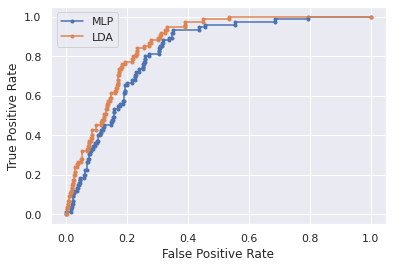

In [ ]:
lr_auc = roc_auc_score(dt_test.iloc[:,-1], lr[1])
lda_auc = roc_auc_score(dt_test.iloc[:,-1], lda[1])
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Logistic: ROC AUC=%.3f' % (lda_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y, lr[1])
lda_fpr, lda_tpr, _ = roc_curve(y, lda[1])

# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
pyplot.plot(lda_fpr, lda_tpr, marker='.', label='LDA')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Guardar arxiu de train balancejat

In [ ]:
dt_train_smote.to_csv('/content/drive/My Drive/TREBALL_IAAE/Jordi_Marc/dataset_apoplexia_SMOTE_train.csv')